In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
import io
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample (1).csv


In [26]:
#Importing dataset

train = pd.read_csv(io.StringIO(uploaded['sample.csv'].decode('utf-8'))).fillna(0)
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18,11,5,13,14,9,9,22,26,24,...,32,63,15,26,14,20,22,19,18,20
1,11,14,15,18,11,13,22,11,10,4,...,17,42,28,15,9,30,52,45,26,20
2,35,13,10,94,4,26,14,9,11,16,...,32,10,26,27,16,11,17,19,10,11
3,118,26,30,24,29,127,53,37,20,32,...,64,35,35,28,20,23,32,39,32,17
4,5,23,14,12,9,9,35,15,14,22,...,34,105,72,36,33,30,36,38,31,97


In [0]:
#Dropping Page Column
train = train.drop('Page',axis = 1)

In [63]:
#Using Data From Random Row for Training and Testing

row = train.iloc[77,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

In [0]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

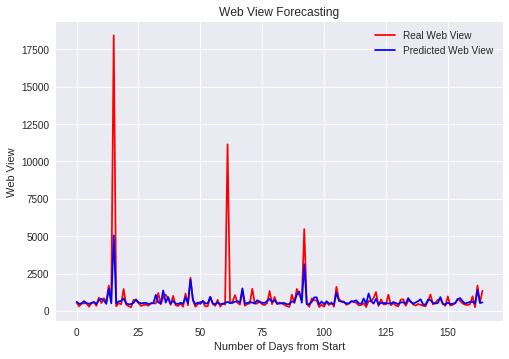

In [66]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [0]:
#As you can see the prediction is quite accurate for a test set. Now repeat this for some other rows

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


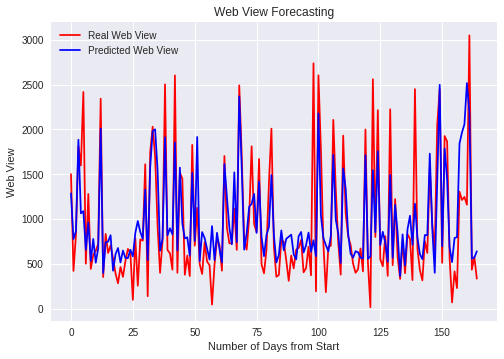

In [67]:
row = train.iloc[15,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


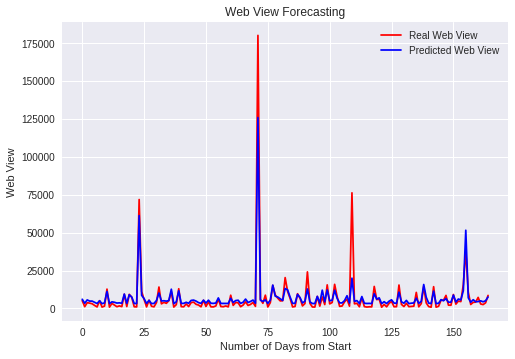

In [75]:
row = train.iloc[19,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


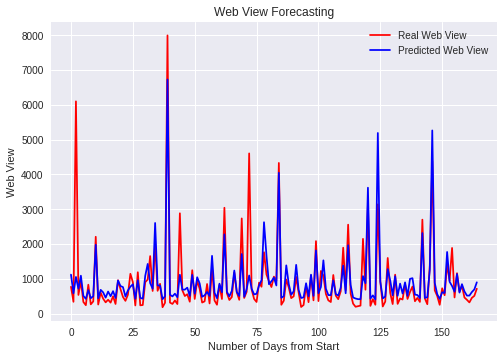

In [78]:
row = train.iloc[58,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


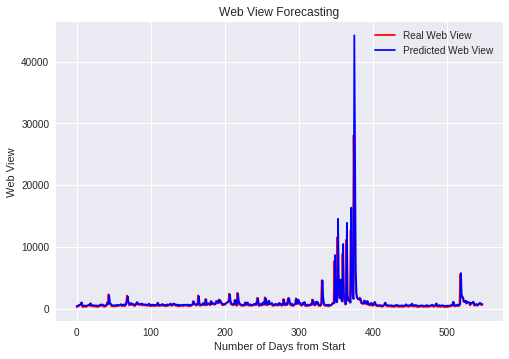

In [79]:
#Now lets train on one page and test on another page
train_row = train.iloc[15,:].values
X = train_row[0:549]
y = train_row[1:550]


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X,(-1,1))
y_train = np.reshape(y,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (549,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
test_row = train.iloc[77,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

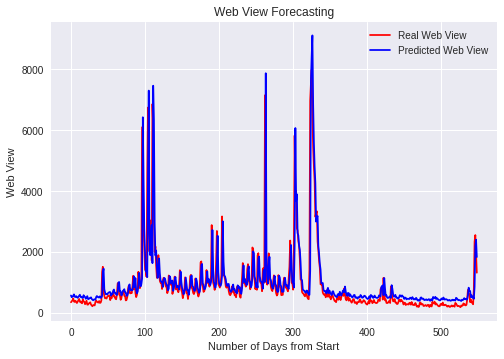

In [80]:
#Repeating on another page
# Getting the predicted Web View
test_row = train.iloc[58,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

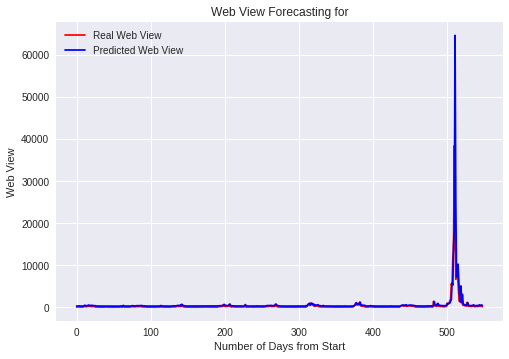

In [81]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

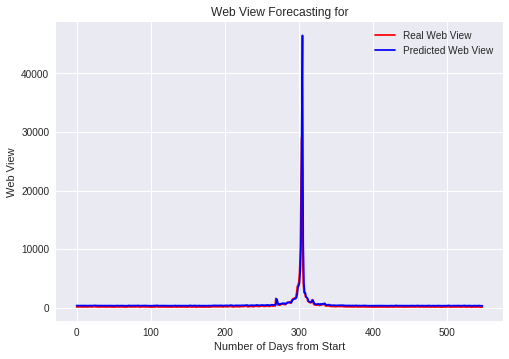

In [82]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

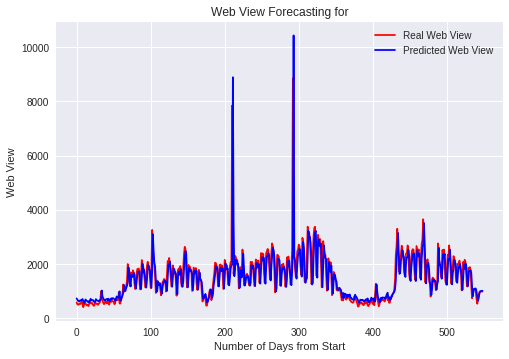

In [83]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [0]:
# Getting the Mean Web View - 1000 Pages
y_test_mean = []
y_pred_mean = []
for X_value in range(0,100):
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))

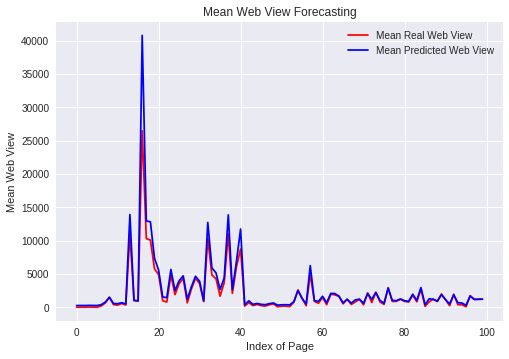

In [85]:
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

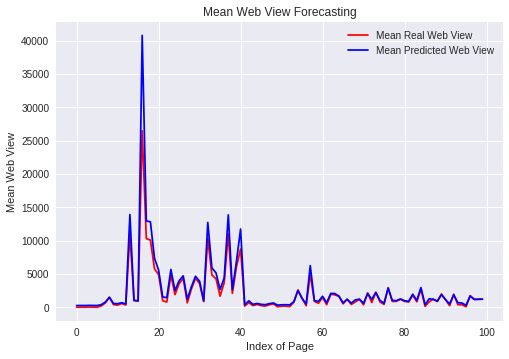

In [86]:
# Getting the Mean Web View - 100 Pages
y_test_mean = []
y_pred_mean = []
for X_value in range(0,100):
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

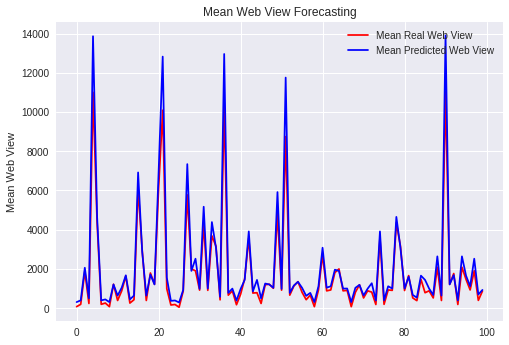

In [87]:
# Getting the Mean Web View - random 100 Pages in between
pages = np.random.randint(0,train.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

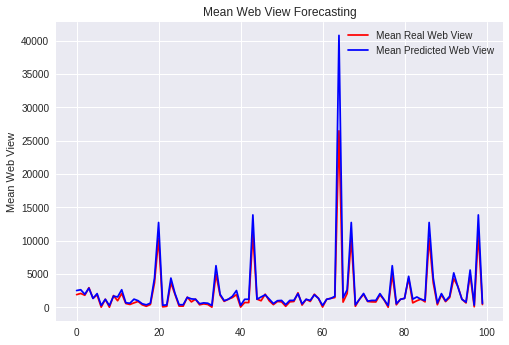

In [88]:
# Getting the Mean Web View - random 100 Pages in between
pages = np.random.randint(0,train.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()